In [1]:
import bandit_gen
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from averagebandit import AverageBandit
from bandit import simulate_averages
from itertools import product

In [2]:
reps = 100
epochs = 2000
rx_data = pd.DataFrame()
pBest_data = pd.DataFrame()

In [3]:
def run_epsilon(epsilon):
    col = column_name(epsilon)
    if col in rx_data: return
    e_init, e_decay = epsilon
    rx, pBest = simulate_averages(
        AverageBandit(e=e_init, e_decay=e_decay),
        reps=reps, epochs=epochs)
    
    rx_data[col] = rx
    pBest_data[col] = pBest
    
def graph_epsilons(epsilons):
    for epsilon in epsilons: run_epsilon(epsilon)
    columns = list(map(column_name, epsilons))
    with sns.axes_style("whitegrid"):
        fig, ax = plt.subplots(1,2)
        sns.lineplot(ax=ax[0], data=rx_data.loc[:,columns]).set_title("E[Rx]")
        sns.lineplot(ax=ax[1], data=pBest_data.loc[:,columns]).set_title("P(Rx=Best)")
        
def column_name(epsilon):
    e_init, e_decay = epsilon
    return 'e=%1.2f, de=%1.4f' % (e_init, e_decay)

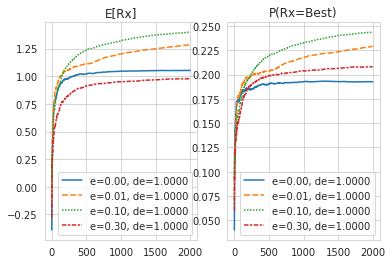

In [4]:
graph_epsilons([(0, 1), (.01, 1), (.1, 1), (.3, 1)])

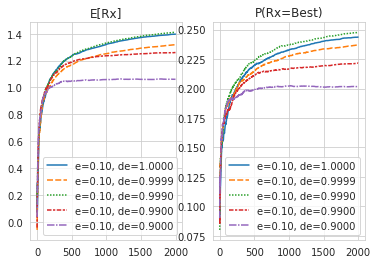

In [5]:
graph_epsilons([(.1, 1), (.1, .9999), (.1, .999), (.1, .99), (.1, .9)])

In [ ]:
graph_epsilons([(.3, 1), (.3, .9999), (.3, .999), (.3, .99), (.3, .9)])